In [25]:
# Install Packages
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/rails_github_issues_dataset_raw.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,pull_request,body,timeline_url,performed_via_github_app
0,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/50434,2054947144,PR_kwDNIULOYrR8QQ,50434,Fix: #50293 Bump ActiveSupport::Cache.format_v...,...,1,2023-12-24T00:43:36Z,2023-12-24T06:10:32Z,2023-12-24T04:32:08Z,NONE,NaN,{'url': 'https://api.github.com/repos/rails/ra...,### Motivation / Background\r\nThis pull reque...,https://api.github.com/repos/rails/rails/issue...,NaN
1,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/50433,2054564439,PR_kwDNIULOYq-7_Q,50433,Add flexibility to argument check in docker en...,...,0,2023-12-22T23:00:12Z,2023-12-22T23:00:17Z,NaN,NONE,NaN,{'url': 'https://api.github.com/repos/rails/ra...,This allows prepending commands to `./bin/rail...,https://api.github.com/repos/rails/rails/issue...,NaN
2,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/50432,2054555146,PR_kwDNIULOYq-d5Q,50432,Document missing `:using` and `:where` options...,...,0,2023-12-22T22:37:51Z,2023-12-22T22:37:55Z,NaN,MEMBER,NaN,{'url': 'https://api.github.com/repos/rails/ra...,Exclusion constraints were added in https://gi...,https://api.github.com/repos/rails/rails/issue...,NaN
3,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/50431,2054546324,PR_kwDNIULOYq-BBg,50431,Add `exclusion_constraint_exists?` and `unique...,...,0,2023-12-22T22:18:21Z,2023-12-22T22:18:45Z,NaN,MEMBER,NaN,{'url': 'https://api.github.com/repos/rails/ra...,Exclusion constraints were added in https://gi...,https://api.github.com/repos/rails/rails/issue...,NaN
4,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/50430,2054326168,PR_kwDNIULOYqx4fQ,50430,Introduce predicate definition when defining s...,...,2,2023-12-22T18:05:28Z,2023-12-24T01:55:51Z,NaN,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/rails/ra...,### Motivation / Background\r\n\r\nCreates par...,https://api.github.com/repos/rails/rails/issue...,NaN


In [4]:
# Display the Columns
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'pull_request', 'body', 'timeline_url',
       'performed_via_github_app'],
      dtype='object')

In [5]:
df.shape

(50136, 27)

In [6]:
df.dtypes

url                          object
repository_url               object
labels_url                   object
comments_url                 object
events_url                   object
html_url                     object
id                            int64
node_id                      object
number                        int64
title                        object
user                         object
labels                       object
state                        object
locked                         bool
assignee                     object
assignees                    object
milestone                    object
comments                      int64
created_at                   object
updated_at                   object
closed_at                    object
author_association           object
active_lock_reason           object
pull_request                 object
body                         object
timeline_url                 object
performed_via_github_app    float64
dtype: object

In [7]:
# List of columns to be removed
columns_to_remove = [
        'url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url',
        'id', 'node_id', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
        'author_association', 'active_lock_reason', 'timeline_url', 'performed_via_github_app', 'state'
    ]

# Remove specified columns
df = df.drop(columns=columns_to_remove, errors='ignore')
df.columns

Index(['number', 'title', 'user', 'labels', 'created_at', 'updated_at',
       'closed_at', 'pull_request', 'body'],
      dtype='object')

In [8]:
# Extract only the 'name' information from the 'labels' column
df['labels'] = df['labels'].apply(lambda labels: [label['name'] for label in eval(labels)] if pd.notna(labels) else [])

In [9]:
# Convert the labels list to a string
df['labels'] = df['labels'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x))

In [10]:
df['labels']

0        activesupport, railties
1                       railties
2                   activerecord
3                   activerecord
4             activerecord, docs
                  ...           
50131                           
50132                           
50133                 actionpack
50134                           
50135                           
Name: labels, Length: 50136, dtype: object

In [11]:
# Add a new column 'is_pull_request'
df['is_pull_request'] = df['pull_request'].notnull()

In [12]:
# Remove the rows where 'labels' is null
df = df[df['labels'].map(lambda d: len(d)) > 0]

In [13]:
# Extract labels from the 'labels' column and split them
labels_column = df['labels'].str.split(',')

# Initialize an empty set to store unique labels
unique_labels = set()

# Iterate through each row to extract and add labels to the set
for labels_list in labels_column.dropna():
    # Iterate through the list of labels and add them to the set
    for label in labels_list:
        unique_labels.add(label.strip())  # strip to remove leading/trailing whitespaces
print(unique_labels)
print("Number of Unique Labels:", len(unique_labels))

{'actioncable', 'needs work', 'pinned', 'needs feedback', 'actionview', 'activerecord', 'PostgreSQL', 'release blocker', 'onhold', 'regression', 'parallel testing', 'engines', 'JRuby', 'i18n', 'With reproduction steps', 'ci issues', 'stale', 'duplicate', 'MySQL', 'actionmailer', 'asset pipeline', 'third party issue', 'security', 'ready', 'routing', 'more-information-needed', 'Missing changelog', 'onboarding', 'enum', 'good first issue', 'actionmailbox', 'activejob', 'docs', 'accepted', 'SQLite', 'rejected', 'actionpack', 'activestorage', 'rails-ujs', 'openacademy', 'actiontext', 'needs backport', 'railties', 'activesupport', 'attached PR', 'autoloading', 'need rebase', 'encryption', 'activemodel'}
Number of Unique Labels: 49


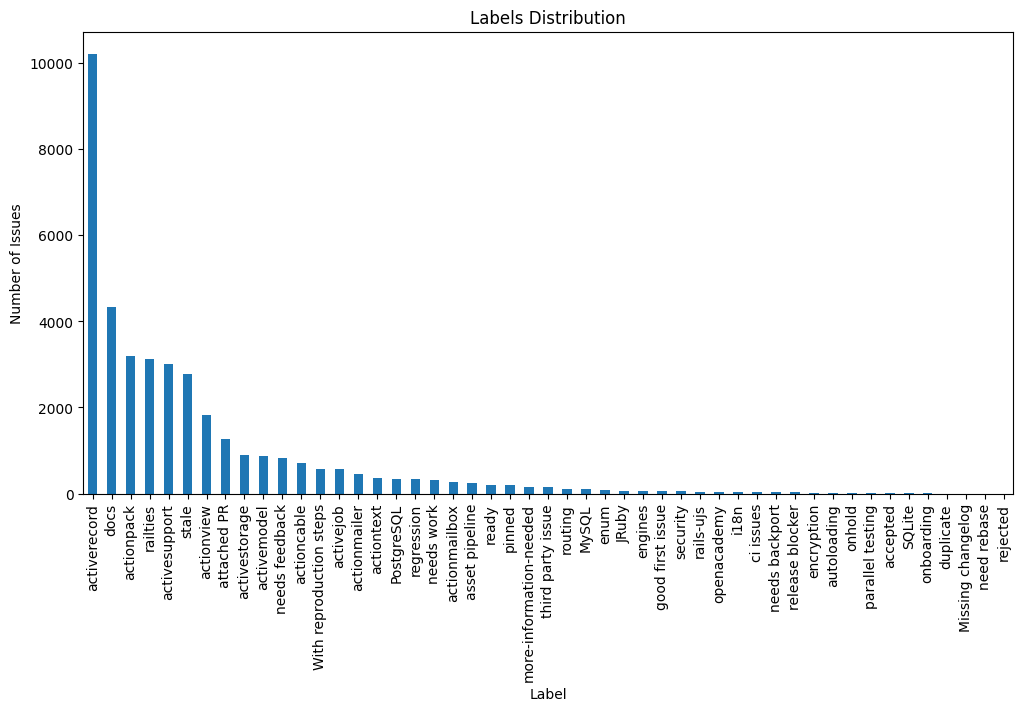

In [14]:
label_counts = df['labels'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', title='Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Issues')
#plt.savefig('plots/label_distribution.png',bbox_inches='tight')
plt.show()

In [11]:
# Extract login of the user that submitted the Issue
df['user'] = df['user'].apply(lambda user: eval(user)['login'] if pd.notna(user) else None)

In [16]:
# Display the first few rows of the DataFrame
df.head()

,number,title,user,labels,created_at,updated_at,closed_at,pull_request,body,is_pull_request
0,50434,Fix: #50293 Bump ActiveSupport::Cache.format_v...,rubyrider,"activesupport, railties",2023-12-24T00:43:36Z,2023-12-24T06:10:32Z,2023-12-24T04:32:08Z,{'url': 'https://api.github.com/repos/rails/ra...,### Motivation / Background\r\nThis pull reque...,True
1,50433,Add flexibility to argument check in docker en...,motdotla,railties,2023-12-22T23:00:12Z,2023-12-22T23:00:17Z,NaN,{'url': 'https://api.github.com/repos/rails/ra...,This allows prepending commands to `./bin/rail...,True
2,50432,Document missing `:using` and `:where` options...,fatkodima,activerecord,2023-12-22T22:37:51Z,2023-12-22T22:37:55Z,NaN,{'url': 'https://api.github.com/repos/rails/ra...,Exclusion constraints were added in https://gi...,True
3,50431,Add `exclusion_constraint_exists?` and `unique...,fatkodima,activerecord,2023-12-22T22:18:21Z,2023-12-22T22:18:45Z,NaN,{'url': 'https://api.github.com/repos/rails/ra...,Exclusion constraints were added in https://gi...,True
4,50430,Introduce predicate definition when defining s...,stevepolitodesign,"activerecord, docs",2023-12-22T18:05:28Z,2023-12-24T01:55:51Z,NaN,{'url': 'https://api.github.com/repos/rails/ra...,### Motivation / Background\r\n\r\nCreates par...,True


C:\Users\USER\AppData\Local\Temp\ipykernel_13748\321050347.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Pull Requests', 'Total'], y=[pull_requests_count, total_data_count], palette=colors)


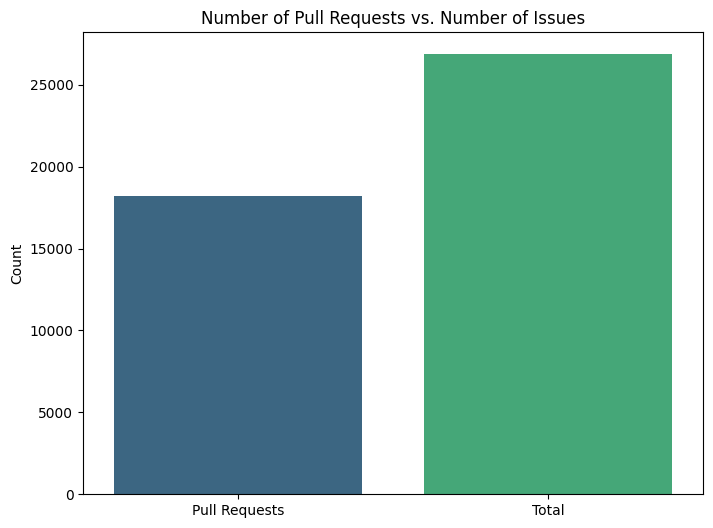

In [17]:
# Count the number of pull requests and issues
total_data_count = len(df)
pull_requests_count = df['is_pull_request'].sum()
#issues_count = len(df) - pull_requests_count

# Create a color list using the 'viridis' colormap
colors = sns.color_palette('viridis', n_colors=2)

# Plot the number of pull requests and issues
plt.figure(figsize=(8, 6))
sns.barplot(x=['Pull Requests', 'Total'], y=[pull_requests_count, total_data_count], palette=colors)
plt.title('Number of Pull Requests vs. Number of Issues')
plt.ylabel('Count')
plt.savefig('plots/pr_distribution.png',bbox_inches='tight')
plt.show()

In [18]:
# Remove rows where 'is_pull_request' is True
df = df[df['is_pull_request'] == False]

In [19]:
# Display the first few rows of the DataFrame
df.head()

,number,title,user,labels,created_at,updated_at,closed_at,pull_request,body,is_pull_request
21,50411,`find_by` is broken when passing an instance t...,claracodes,"activerecord, attached PR, With reproduction s...",2023-12-20T22:27:50Z,2023-12-21T08:36:20Z,NaN,NaN,Big thanks for adding support for composite pr...,False
33,50399,async_count returns a Integer instead of a Pro...,guillaumebriday,"activerecord, attached PR",2023-12-19T16:00:51Z,2023-12-22T05:42:06Z,2023-12-22T05:42:06Z,NaN,### Steps to reproduce\r\n\r\nWhen being cache...,False
34,50398,"API only, multi DB. Undefined method `id' for ...",maxrosecollins,more-information-needed,2023-12-19T14:56:31Z,2023-12-22T13:23:55Z,NaN,NaN,I am upgrading to 7.1.2 from 7.0.7.\r\nIt is a...,False
51,50380,active_record_migrations.rb raises `Unknown mi...,yahonda,ci issues,2023-12-17T08:34:03Z,2023-12-17T14:10:21Z,2023-12-17T14:10:21Z,NaN,There is a CI failure at https://buildkite.com...,False
63,50368,ActiveRecord 7.1 regression in model scoping i...,segiddins,"activerecord, With reproduction steps",2023-12-16T04:43:45Z,2023-12-19T16:35:03Z,2023-12-19T10:50:55Z,NaN,### Steps to reproduce\r\n<!-- (Guidelines for...,False


In [20]:
# Display the first few rows of the DataFrame
df.head()

,number,title,user,labels,created_at,updated_at,closed_at,pull_request,body,is_pull_request
21,50411,`find_by` is broken when passing an instance t...,claracodes,"activerecord, attached PR, With reproduction s...",2023-12-20T22:27:50Z,2023-12-21T08:36:20Z,NaN,NaN,Big thanks for adding support for composite pr...,False
33,50399,async_count returns a Integer instead of a Pro...,guillaumebriday,"activerecord, attached PR",2023-12-19T16:00:51Z,2023-12-22T05:42:06Z,2023-12-22T05:42:06Z,NaN,### Steps to reproduce\r\n\r\nWhen being cache...,False
34,50398,"API only, multi DB. Undefined method `id' for ...",maxrosecollins,more-information-needed,2023-12-19T14:56:31Z,2023-12-22T13:23:55Z,NaN,NaN,I am upgrading to 7.1.2 from 7.0.7.\r\nIt is a...,False
51,50380,active_record_migrations.rb raises `Unknown mi...,yahonda,ci issues,2023-12-17T08:34:03Z,2023-12-17T14:10:21Z,2023-12-17T14:10:21Z,NaN,There is a CI failure at https://buildkite.com...,False
63,50368,ActiveRecord 7.1 regression in model scoping i...,segiddins,"activerecord, With reproduction steps",2023-12-16T04:43:45Z,2023-12-19T16:35:03Z,2023-12-19T10:50:55Z,NaN,### Steps to reproduce\r\n<!-- (Guidelines for...,False


In [12]:
# List of columns to be removed
columns_to_remove = [
        'pull_request', 'is_pull_request'
    ]

# Remove specified columns
df = df.drop(columns=columns_to_remove, errors='ignore')
df.columns

Index(['number', 'title', 'user', 'labels', 'created_at', 'updated_at',
       'closed_at', 'body'],
      dtype='object')

In [13]:
df.shape

(50136, 8)

In [14]:
df.dtypes

number         int64
title         object
user          object
labels        object
created_at    object
updated_at    object
closed_at     object
body          object
dtype: object

In [15]:
# Extract the latest 500 issues
new_df = df.head(500)

In [16]:
# Display the first few rows
new_df.head()

,number,title,user,labels,created_at,updated_at,closed_at,body
0,50434,Fix: #50293 Bump ActiveSupport::Cache.format_v...,rubyrider,"activesupport, railties",2023-12-24T00:43:36Z,2023-12-24T06:10:32Z,2023-12-24T04:32:08Z,### Motivation / Background\r\nThis pull reque...
1,50433,Add flexibility to argument check in docker en...,motdotla,railties,2023-12-22T23:00:12Z,2023-12-22T23:00:17Z,NaN,This allows prepending commands to `./bin/rail...
2,50432,Document missing `:using` and `:where` options...,fatkodima,activerecord,2023-12-22T22:37:51Z,2023-12-22T22:37:55Z,NaN,Exclusion constraints were added in https://gi...
3,50431,Add `exclusion_constraint_exists?` and `unique...,fatkodima,activerecord,2023-12-22T22:18:21Z,2023-12-22T22:18:45Z,NaN,Exclusion constraints were added in https://gi...
4,50430,Introduce predicate definition when defining s...,stevepolitodesign,"activerecord, docs",2023-12-22T18:05:28Z,2023-12-24T01:55:51Z,NaN,### Motivation / Background\r\n\r\nCreates par...


In [17]:
# Save the updated DataFrame to the CSV file
new_df.to_csv('data/rails_github_issues_dataset_raw_500.csv', index=False, encoding='utf-8')